First things first, let load our dataset, check for missing values, and try to understand the shape and types of our data.

In [2]:
import pandas as pd 

# Load dataset
df = pd.read_csv("/workspaces/heart-failure-readmission-prediction/data/GHW_HeartFailure_Readmission.csv")

# Display basic information
print(df.info())
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Patient_ID             1000 non-null   int64  
 1   Age                    1000 non-null   int64  
 2   Gender                 1000 non-null   object 
 3   Ethnicity              1000 non-null   object 
 4   Length_of_Stay         1000 non-null   int64  
 5   Previous_Admissions    1000 non-null   int64  
 6   Discharge_Disposition  1000 non-null   object 
 7   Pulse                  1000 non-null   int64  
 8   Temperature            1000 non-null   float64
 9   Heart_Rate             1000 non-null   int64  
 10  Systolic_BP            1000 non-null   int64  
 11  Diastolic_BP           1000 non-null   int64  
 12  Respiratory_Rate       1000 non-null   int64  
 13  BUN                    1000 non-null   int64  
 14  Creatinine             1000 non-null   float64
 15  Sodiu

,Patient_ID,Age,Gender,Ethnicity,Length_of_Stay,Previous_Admissions,Discharge_Disposition,Pulse,Temperature,Heart_Rate,Systolic_BP,Diastolic_BP,Respiratory_Rate,BUN,Creatinine,Sodium,Hemoglobin,NT_proBNP,Ejection_Fraction,Readmission_30Days
0,1,83,Male,Other,7,4,Rehab,119,37.1,147,160,99,27,11,0.61,127,13.1,2973,39,0
1,2,73,Female,Hispanic,10,2,Home,107,38.4,54,151,75,13,15,1.48,145,11.4,3220,56,0
2,3,59,Female,White,5,1,Expired,63,39.0,118,112,57,21,26,1.54,147,10.9,1190,50,0
3,4,87,Female,White,8,3,Expired,86,39.2,80,135,55,27,34,1.63,133,10.1,2934,29,1
4,5,52,Female,Asian,1,1,Home,117,38.5,94,145,79,16,32,2.57,146,12.8,4324,37,0


Let's check for missing values.

In [3]:
# Check for missing values
print(df.isnull().sum())

# Check data types
print(df.dtypes)

Patient_ID               0
Age                      0
Gender                   0
Ethnicity                0
Length_of_Stay           0
Previous_Admissions      0
Discharge_Disposition    0
Pulse                    0
Temperature              0
Heart_Rate               0
Systolic_BP              0
Diastolic_BP             0
Respiratory_Rate         0
BUN                      0
Creatinine               0
Sodium                   0
Hemoglobin               0
NT_proBNP                0
Ejection_Fraction        0
Readmission_30Days       0
dtype: int64
Patient_ID                 int64
Age                        int64
Gender                    object
Ethnicity                 object
Length_of_Stay             int64
Previous_Admissions        int64
Discharge_Disposition     object
Pulse                      int64
Temperature              float64
Heart_Rate                 int64
Systolic_BP                int64
Diastolic_BP               int64
Respiratory_Rate           int64
BUN               

Luckily this dataset seems to have to no missing values.  Next lets check for duplicates and outliers.

In [4]:
# Check for duplicate rows
print(f"Duplicate rows:", df.duplicated().sum())

#Summary statistics to find outliers
df.describe()

Duplicate rows: 0


,Patient_ID,Age,Length_of_Stay,Previous_Admissions,Pulse,Temperature,Heart_Rate,Systolic_BP,Diastolic_BP,Respiratory_Rate,BUN,Creatinine,Sodium,Hemoglobin,NT_proBNP,Ejection_Fraction,Readmission_30Days
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,67.000000,7.407000,1.948000,84.714000,37.715300,98.77000,135.493000,79.289000,20.563000,23.139000,1.772730,137.097000,12.53170,2552.547000,44.149000,0.287000
std,288.819436,12.945562,4.086325,1.429454,20.022465,1.001438,29.20853,25.956303,17.348327,5.103732,9.381241,0.715125,7.019178,2.58824,1416.044376,14.733699,0.452588
min,1.000000,45.000000,1.000000,0.000000,50.000000,36.000000,50.00000,90.000000,50.000000,12.000000,7.000000,0.500000,125.000000,8.00000,100.000000,20.000000,0.000000
25%,250.750000,56.000000,4.000000,1.000000,67.000000,36.800000,74.00000,112.000000,65.000000,16.000000,15.000000,1.190000,131.000000,10.40000,1352.750000,32.000000,0.000000
50%,500.500000,68.000000,7.000000,2.000000,85.000000,37.700000,97.00000,136.000000,79.000000,21.000000,23.000000,1.770000,137.000000,12.60000,2546.000000,43.500000,0.000000
75%,750.250000,78.000000,11.000000,3.000000,102.000000,38.600000,125.00000,159.000000,94.250000,25.000000,31.000000,2.380000,143.000000,14.80000,3747.250000,57.000000,1.000000
max,1000.000000,89.000000,14.000000,4.000000,119.000000,39.500000,149.00000,179.000000,109.000000,29.000000,39.000000,3.000000,149.000000,17.00000,4997.000000,69.000000,1.000000


Now we will start some exploritory analysis to better understand the dataset. Then visualize some of the analysis. 

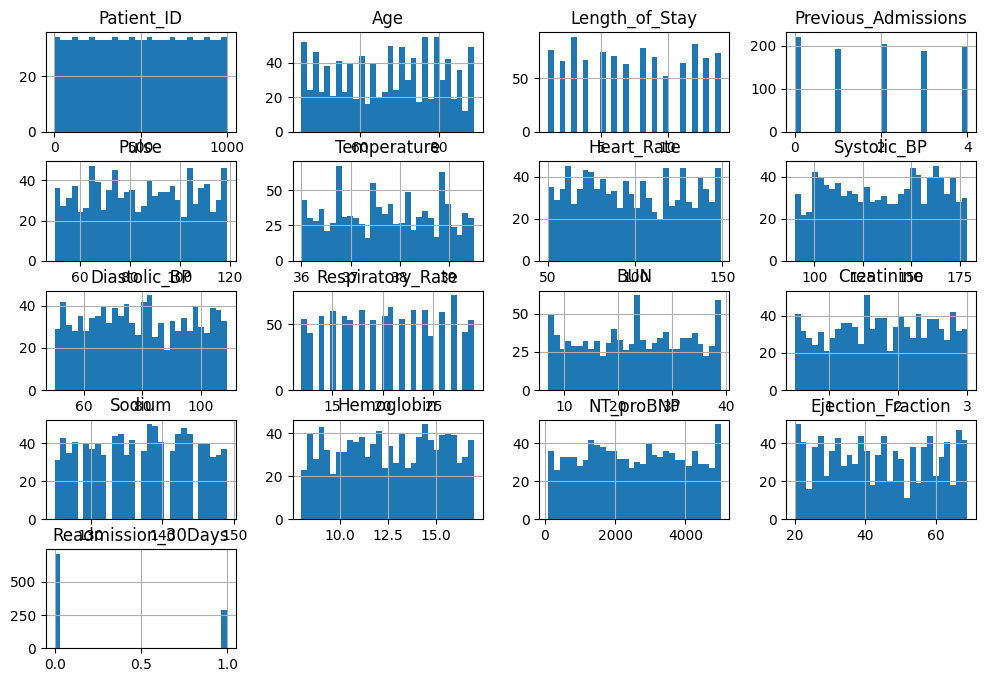

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Historgram for numerical features
df.hist(figsize=(12,8), bins=30)
plt.show()

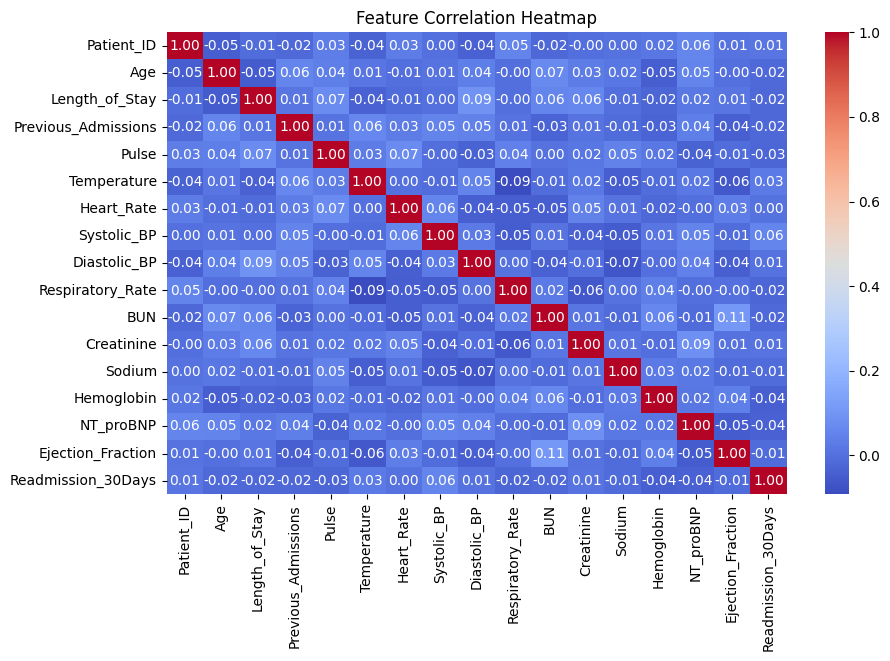

In [6]:
# Heatmap for correlations
# Select only numerical columns
numeric_df = df.select_dtypes(include=["number"])
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

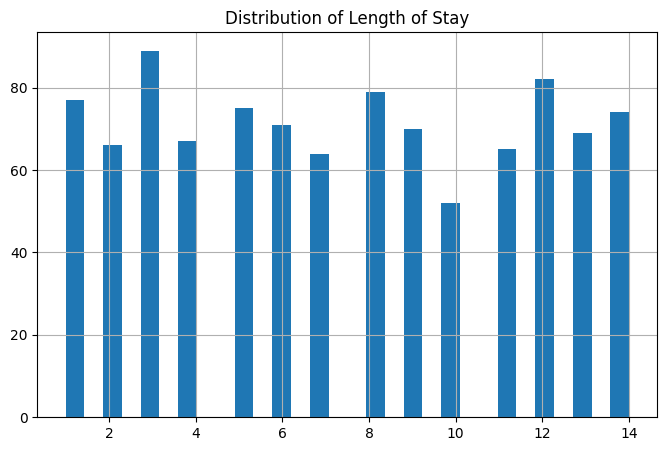

In [7]:
df["Length_of_Stay"].hist(bins=30, figsize=(8,5))
plt.title("Distribution of Length of Stay")
plt.show()

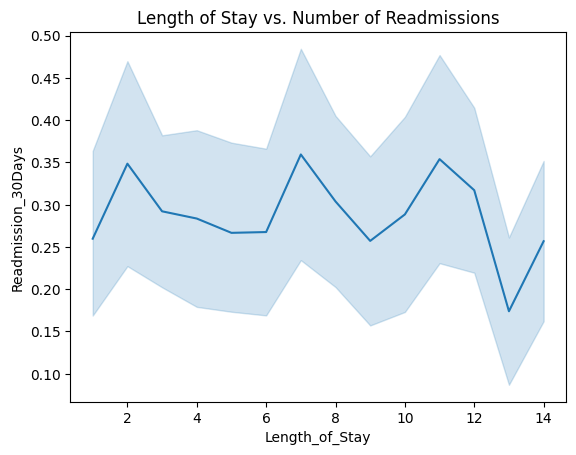

In [12]:
sns.lineplot(data=df, x=df["Length_of_Stay"], y=df["Readmission_30Days"])
plt.title("Length of Stay vs. Number of Readmissions")
plt.show()

Based on the above, there seems to be specific time length of stay that more often correlate to readmission (2 days, 7 days, and 11 days).  More analysis is warranted. 